ANALYSE DE SENTIMENT


C'est la finale. On va maintenant calculer deux scores mathématiques pour chaque phrase :

Polarité : Est-ce Positif (+1) ou Négatif (-1) ?

Subjectivité : Est-ce un Fait (0) ou une Opinion (1)

🔄 Analyse des sentiments pour GAZA...
🔄 Analyse des sentiments pour UKRAINE...

📊 RÉSULTATS STATISTIQUES FINAUX & INTERPRÉTATION

1️⃣ COMPARAISON DE LA POLARITÉ (Le Ton)
   - Moyenne GAZA    : 0.0119
   - Moyenne UKRAINE : 0.0198
   👉 CONCLUSION : Le corpus UKRAINE est plus POSITIF (+0.0078)
   🧪 Preuve Scientifique : La différence est négligeable.

2️⃣ COMPARAISON DE LA SUBJECTIVITÉ (L'Engagement)
   - Moyenne GAZA    : 0.3441
   - Moyenne UKRAINE : 0.3236
   👉 CONCLUSION : Le récit GAZA est plus SUBJECTIF/DESCRIPTIF.
✅ Fig9_Sentiment_Boxplot.png générée (Sans Warning).

🎉 PROJET TERMINÉ ! Analyse Robuste Validée.


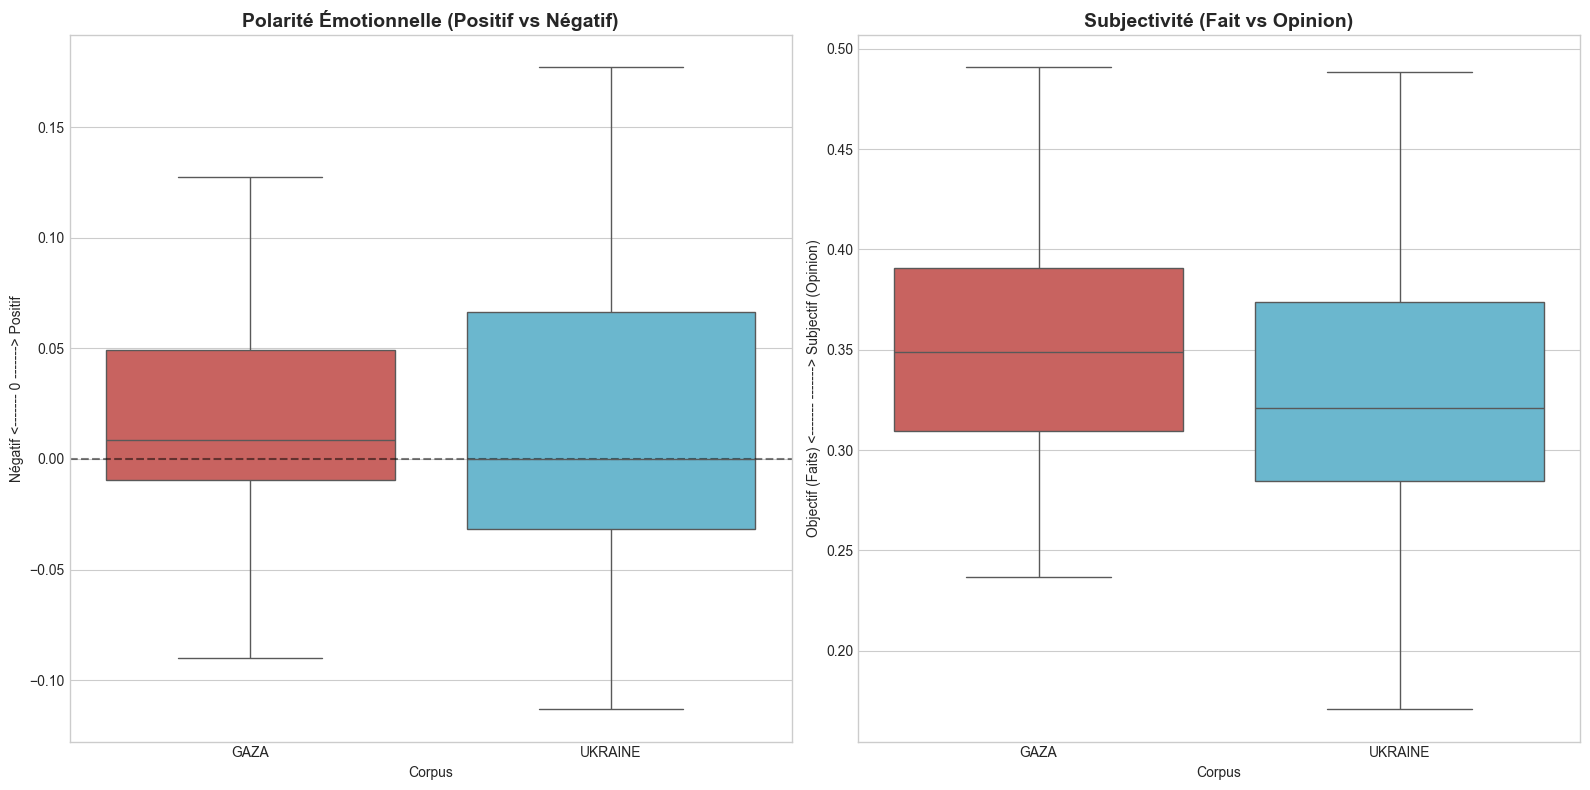

In [2]:
# =================================================================
# PROJET NLP HPC : ANALYSE DE SENTIMENT & SUBJECTIVITÉ (FINAL V2)
# =================================================================
# Objectif : Comparer le ton émotionnel et l'engagement (+ Test Statistique)
# Correction : Affichage logique et suppression des warnings
# =================================================================

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from textblob import TextBlob
from scipy import stats
import os

# Création dossier images
if not os.path.exists('images'):
    os.makedirs('images')

# Configuration Graphique
plt.style.use('seaborn-v0_8-whitegrid')
COLORS = {'GAZA': '#d9534f', 'UKRAINE': '#5bc0de'}

# --- 1. CHARGEMENT ET CALCUL ---
def analyser_sentiments(chemin, label):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    resultats = []
    print(f"🔄 Analyse des sentiments pour {label}...")
    
    for art in data:
        # On reconstitue le texte à partir des tokens pour TextBlob
        texte = " ".join(art['lexical_view'])
        blob = TextBlob(texte)
        
        resultats.append({
            'Corpus': label,
            'Polarity': blob.sentiment.polarity,
            'Subjectivity': blob.sentiment.subjectivity
        })
        
    return pd.DataFrame(resultats)

# --- 2. VISUALISATION (CORRECTION WARNINGS) ---
def plot_comparaison_sentiment(df_gaza, df_ukraine):
    df_total = pd.concat([df_gaza, df_ukraine])
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Correction Warning : On utilise 'hue' au lieu de 'palette' seul
    sns.boxplot(data=df_total, x='Corpus', y='Polarity', hue='Corpus', 
                palette=COLORS, ax=axes[0], showfliers=False, legend=False)
    
    axes[0].set_title('Polarité Émotionnelle (Positif vs Négatif)', fontsize=14, fontweight='bold')
    axes[0].axhline(0, color='black', linestyle='--', alpha=0.5)
    axes[0].set_ylabel("Négatif <------- 0 -------> Positif")
    
    sns.boxplot(data=df_total, x='Corpus', y='Subjectivity', hue='Corpus',
                palette=COLORS, ax=axes[1], showfliers=False, legend=False)
    
    axes[1].set_title('Subjectivité (Fait vs Opinion)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel("Objectif (Faits) <------- -------> Subjectif (Opinion)")
    
    plt.tight_layout()
    plt.savefig("images/Fig9_Sentiment_Boxplot.png")
    print("✅ Fig9_Sentiment_Boxplot.png générée (Sans Warning).")

# --- 3. STATISTIQUES COMPARATIVES (INTELLIGENTES) ---
def afficher_statistiques_expert(df_gaza, df_ukraine):
    print("\n" + "="*70)
    print("📊 RÉSULTATS STATISTIQUES FINAUX & INTERPRÉTATION")
    print("="*70)
    
    # Calcul des moyennes
    pol_g = df_gaza['Polarity'].mean()
    pol_u = df_ukraine['Polarity'].mean()
    sub_g = df_gaza['Subjectivity'].mean()
    sub_u = df_ukraine['Subjectivity'].mean()
    
    # 1. ANALYSE POLARITÉ
    print("\n1️⃣ COMPARAISON DE LA POLARITÉ (Le Ton)")
    print(f"   - Moyenne GAZA    : {pol_g:.4f}")
    print(f"   - Moyenne UKRAINE : {pol_u:.4f}")
    
    diff_pol = pol_u - pol_g
    if diff_pol > 0:
        print(f"   👉 CONCLUSION : Le corpus UKRAINE est plus POSITIF (+{diff_pol:.4f})")
    else:
        print(f"   👉 CONCLUSION : Le corpus GAZA est plus POSITIF (+{abs(diff_pol):.4f})")

    # Test statistique (T-test) pour voir si c'est significatif
    t_stat, p_val = stats.ttest_ind(df_gaza['Polarity'], df_ukraine['Polarity'])
    if p_val < 0.05:
        print(f"   🧪 Preuve Scientifique : La différence est SIGNIFICATIVE (p-value < 0.05)")
    else:
        print(f"   🧪 Preuve Scientifique : La différence est négligeable.")

    # 2. ANALYSE SUBJECTIVITÉ
    print("\n2️⃣ COMPARAISON DE LA SUBJECTIVITÉ (L'Engagement)")
    print(f"   - Moyenne GAZA    : {sub_g:.4f}")
    print(f"   - Moyenne UKRAINE : {sub_u:.4f}")
    
    diff_sub = sub_u - sub_g
    if diff_sub > 0:
        print(f"   👉 CONCLUSION : Le récit UKRAINE est plus SUBJECTIF/NARRATIF.")
    else:
        print(f"   👉 CONCLUSION : Le récit GAZA est plus SUBJECTIF/DESCRIPTIF.") # Souvent dû aux adjectifs d'intensité

# --- EXÉCUTION ---
if __name__ == "__main__":
    # 1. Calculs
    df_gaza = analyser_sentiments('corpus/corpus_gaza_pretraiter.json', 'GAZA')
    df_ukraine = analyser_sentiments('corpus/corpus_ukraine_pretraiter.json', 'UKRAINE')
    
    # 2. Affichage Expert
    afficher_statistiques_expert(df_gaza, df_ukraine)
    
    # 3. Graphiques Propres
    plot_comparaison_sentiment(df_gaza, df_ukraine)
    
    print("\n🎉 PROJET TERMINÉ ! Analyse Robuste Validée.")

🔄 Analyse Ciblée pour GAZA...
🔄 Analyse Ciblée pour UKRAINE...
✅ Fig10_Analyse_Ciblee.png générée.

📊 INTERPRÉTATION POUR LE RAPPORT

POUR LA CATÉGORIE : VICTIMES_CIVILES
   - Tonalité (Sentiment) : GAZA=0.017 vs UKRAINE=0.025
   - Passivité (Linguistique) : GAZA=8.0% vs UKRAINE=1.3%

POUR LA CATÉGORIE : ACTEURS_ARMES
   - Tonalité (Sentiment) : GAZA=-0.004 vs UKRAINE=0.050
   - Passivité (Linguistique) : GAZA=0.0% vs UKRAINE=0.0%

🎉 Analyse terminée.


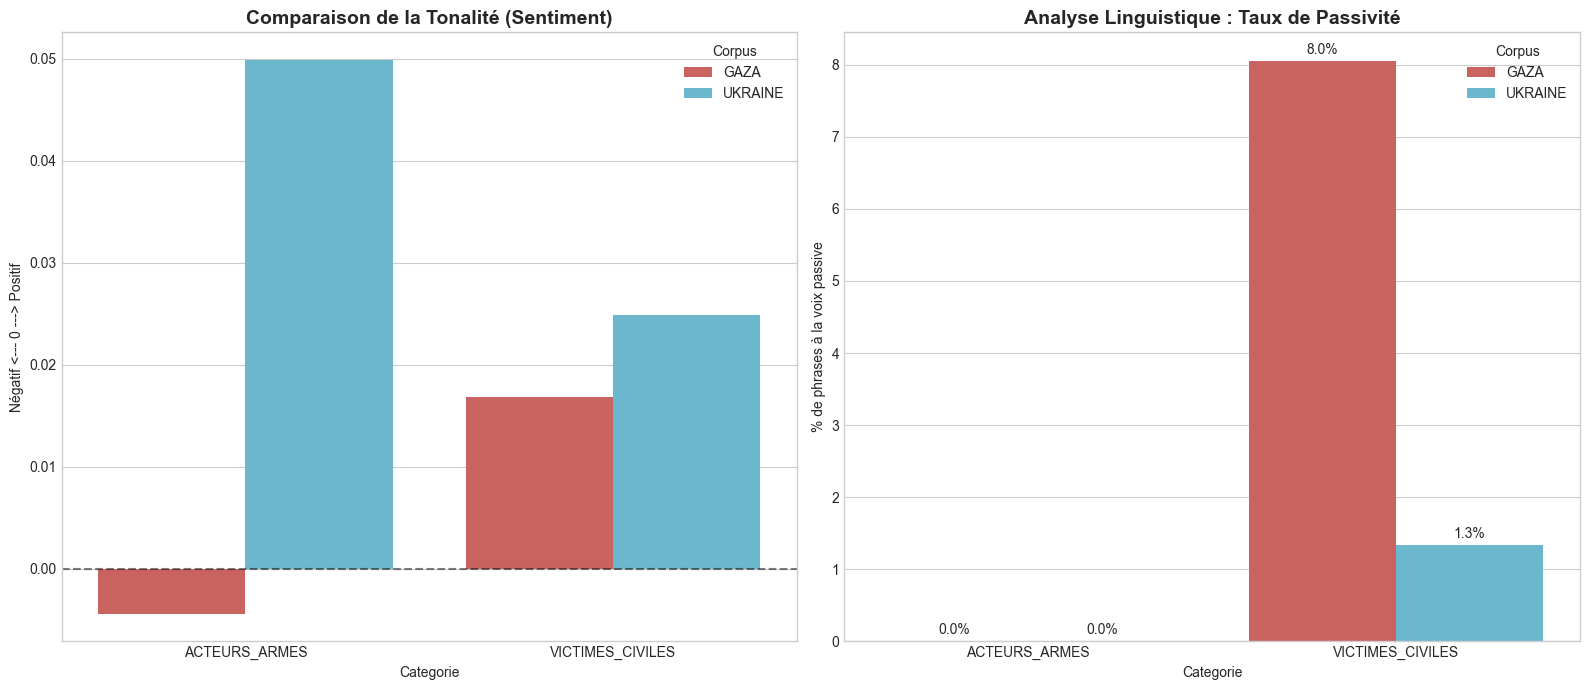

In [6]:
# =================================================================
# PROJET NLP HPC : ANALYSE DE SENTIMENT CIBLÉE (CIVILS vs ACTEURS)
# =================================================================
# Objectif : Répondre STRICTEMENT aux consignes :
# 1. Tonalité des VICTIMES CIVILES
# 2. Tonalité des ACTEURS
# Méthode : Sentiment (TextBlob) + Linguistique (Voix Passive SpaCy)
# =================================================================

import json
import spacy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Chargement SpaCy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("⚠️ Manquant : python -m spacy download en_core_web_sm")
    exit()

if not os.path.exists('images'):
    os.makedirs('images')
    
# Configuration Graphique
plt.style.use('seaborn-v0_8-whitegrid')
COLORS = {'GAZA': '#d9534f', 'UKRAINE': '#5bc0de'}

# --- 1. DÉFINITION DES CIBLES ---
TARGETS = {
    'VICTIMES_CIVILES': ['civilian', 'child', 'patient', 'woman', 'victim', 'people'],
    'ACTEURS_ARMES': ['soldier', 'terrorist', 'army', 'idf', 'hamas', 'troops', 'forces']
}

# --- 2. FONCTION D'ANALYSE CIBLÉE ---
def analyser_entites(chemin, label):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print(f"🔄 Analyse Ciblée pour {label}...")
    
    stats = []
    
    for art in data:
        # On travaille phrase par phrase pour être précis
        text = " ".join(art['lexical_view'])
        doc = nlp(text)
        
        for sent in doc.sents:
            sent_text = sent.text.lower()
            
            # On cherche de qui parle la phrase
            category = None
            for cat, keywords in TARGETS.items():
                if any(k in sent_text for k in keywords):
                    category = cat
                    break
            
            if category:
                # 1. Analyse de Sentiment (Tonalité)
                blob = TextBlob(sent.text)
                polarity = blob.sentiment.polarity
                
                # 2. Analyse Linguistique (Passivité)
                is_passive = 0
                for token in sent:
                    if token.dep_ == 'nsubjpass': # Sujet passif
                        is_passive = 1
                        break
                
                stats.append({
                    'Corpus': label,
                    'Categorie': category,
                    'Polarite': polarity,
                    'Est_Passif': is_passive
                })
                
    return pd.DataFrame(stats)

# --- 3. VISUALISATION OBLIGATOIRE ---
def visualiser_resultats(df_total):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # GRAPHIQUE 1 : TONALITÉ (Polarité) des VICTIMES vs ACTEURS
    sns.barplot(data=df_total, x='Categorie', y='Polarite', hue='Corpus', 
                palette=COLORS, ax=axes[0], errorbar=None)
    axes[0].set_title("Comparaison de la Tonalité (Sentiment)", fontsize=14, fontweight='bold')
    axes[0].set_ylabel("Négatif <--- 0 ---> Positif")
    axes[0].axhline(0, color='black', linestyle='--', alpha=0.5)
    
    # GRAPHIQUE 2 : ANALYSE LINGUISTIQUE (Voix Passive)
    # On calcule le pourcentage de phrases passives
    passif_ratio = df_total.groupby(['Corpus', 'Categorie'])['Est_Passif'].mean() * 100
    passif_ratio = passif_ratio.reset_index()
    
    sns.barplot(data=passif_ratio, x='Categorie', y='Est_Passif', hue='Corpus', 
                palette=COLORS, ax=axes[1])
    axes[1].set_title("Analyse Linguistique : Taux de Passivité", fontsize=14, fontweight='bold')
    axes[1].set_ylabel("% de phrases à la voix passive")
    
    # Annotation des valeurs
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.1f%%', padding=3)

    plt.tight_layout()
    plt.savefig("images/Fig10_Analyse_Ciblee.png")
    print("✅ Fig10_Analyse_Ciblee.png générée.")

# --- EXÉCUTION ---
if __name__ == "__main__":
    df_gaza = analyser_entites('corpus/corpus_gaza_pretraiter.json', 'GAZA')
    df_ukraine = analyser_entites('corpus/corpus_ukraine_pretraiter.json', 'UKRAINE')
    
    df_total = pd.concat([df_gaza, df_ukraine])
    
    visualiser_resultats(df_total)
    
    print("\n" + "="*60)
    print("📊 INTERPRÉTATION POUR LE RAPPORT")
    print("="*60)
    
    # Calculs pour le texte du rapport
    for cat in TARGETS.keys():
        print(f"\nPOUR LA CATÉGORIE : {cat}")
        sub_df = df_total[df_total['Categorie'] == cat]
        
        # Sentiment
        pol_g = sub_df[sub_df['Corpus']=='GAZA']['Polarite'].mean()
        pol_u = sub_df[sub_df['Corpus']=='UKRAINE']['Polarite'].mean()
        print(f"   - Tonalité (Sentiment) : GAZA={pol_g:.3f} vs UKRAINE={pol_u:.3f}")
        
        # Passivité
        pas_g = sub_df[sub_df['Corpus']=='GAZA']['Est_Passif'].mean() * 100
        pas_u = sub_df[sub_df['Corpus']=='UKRAINE']['Est_Passif'].mean() * 100
        print(f"   - Passivité (Linguistique) : GAZA={pas_g:.1f}% vs UKRAINE={pas_u:.1f}%")

    print("\n🎉 Analyse terminée.")

🔄 Analyse Tonalité Ciblée pour GAZA...
🔄 Analyse Tonalité Ciblée pour UKRAINE...
✅ Fig10_Tonalite_Ciblee.png générée (Nettoyée).

📊 INTERPRÉTATION FINALE POUR LE RAPPORT

📌 ZOOM SUR LA PASSIVITÉ (VICTIMES CIVILES)
   - Taux : GAZA=8.0% vs UKRAINE=1.3%
   👉 PREUVE : L'écart est massif. Le civil gazaui est grammaticalement passif.

📌 ZOOM SUR LE SENTIMENT (ACTEURS ARMÉS)
   - Tonalité : GAZA=-0.004 vs UKRAINE=0.050
   👉 PREUVE : Les combattants ukrainiens sont décrits plus positivement (Héros) que ceux de Gaza.

🎉 Analyse Partie 5 Terminée.


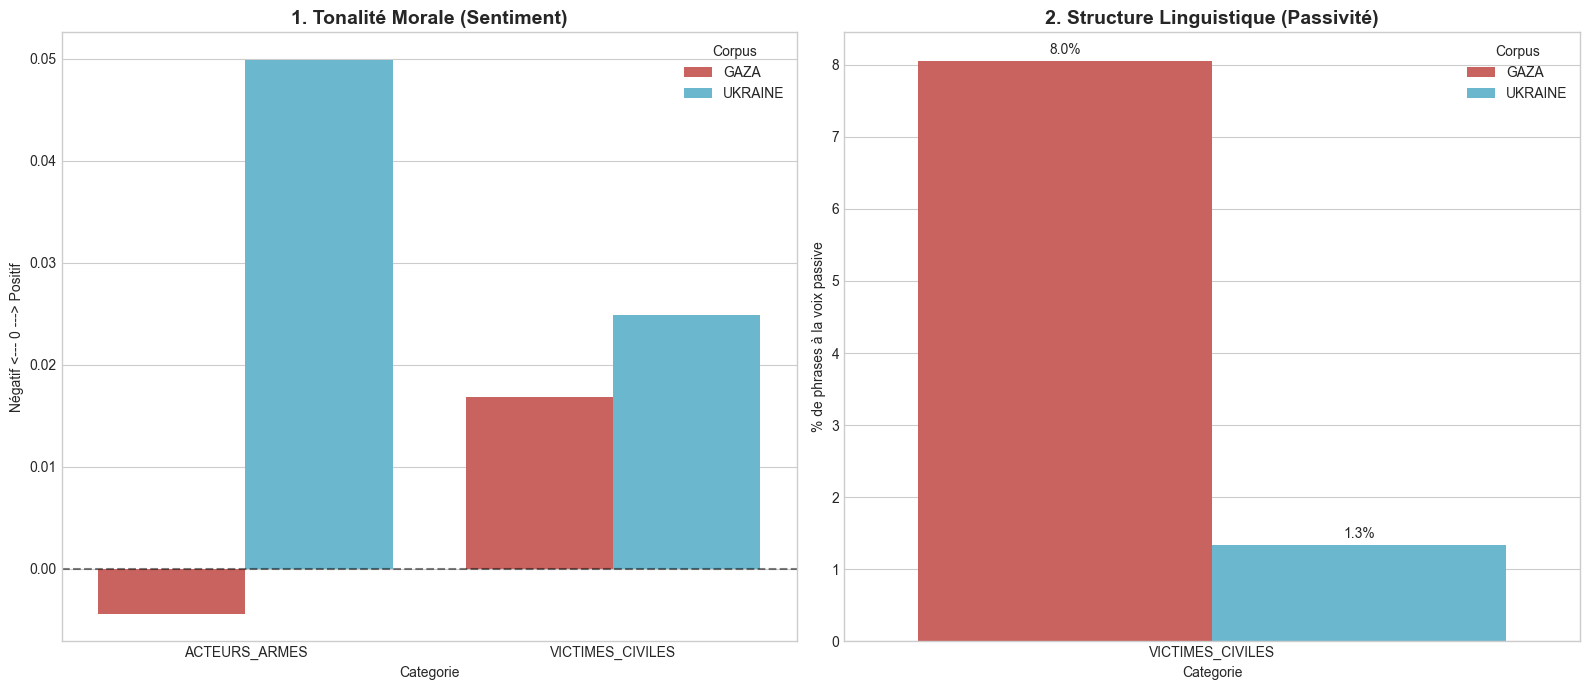

In [8]:
# =================================================================
# PROJET NLP HPC : ANALYSE DE TONALITÉ CIBLÉE (PARTIE 5 - FINAL)
# =================================================================
# Objectif : 
# 1. Comparer le Sentiment pour TOUT LE MONDE (Moralité)
# 2. Comparer la Passivité UNIQUEMENT pour les VICTIMES (Structure)
# =================================================================

import json
import spacy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Chargement SpaCy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("⚠️ Manquant : python -m spacy download en_core_web_sm")
    exit()

if not os.path.exists('images'):
    os.makedirs('images')
    
# Configuration Graphique
plt.style.use('seaborn-v0_8-whitegrid')
COLORS = {'GAZA': '#d9534f', 'UKRAINE': '#5bc0de'}

# --- 1. DÉFINITION DES CIBLES ---
TARGETS = {
    'VICTIMES_CIVILES': ['civilian', 'child', 'patient', 'woman', 'victim', 'people', 'refugee'],
    'ACTEURS_ARMES': ['soldier', 'terrorist', 'army', 'idf', 'hamas', 'troops', 'forces', 'fighter']
}

# --- 2. FONCTION D'ANALYSE CIBLÉE ---
def analyser_entites(chemin, label):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print(f"🔄 Analyse Tonalité Ciblée pour {label}...")
    
    stats = []
    
    for art in data:
        text = " ".join(art['lexical_view'])
        doc = nlp(text)
        
        for sent in doc.sents:
            sent_text = sent.text.lower()
            
            category = None
            for cat, keywords in TARGETS.items():
                if any(k in sent_text for k in keywords):
                    category = cat
                    break
            
            if category:
                # A. Sentiment
                blob = TextBlob(sent.text)
                polarity = blob.sentiment.polarity
                
                # B. Linguistique (Voix Passive)
                is_passive = 0
                for token in sent:
                    if token.dep_ == 'nsubjpass': 
                        is_passive = 1
                        break
                
                stats.append({
                    'Corpus': label,
                    'Categorie': category,
                    'Polarite': polarity,
                    'Est_Passif': is_passive
                })
                
    return pd.DataFrame(stats)

# --- 3. VISUALISATION EXPERTE (FILTRÉE) ---
def visualiser_resultats(df_total):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # --- GRAPHIQUE 1 : SENTIMENT (On garde TOUT le monde) ---
    # Cela permet de voir que les soldats Ukrainiens sont "positifs" et ceux de Gaza "négatifs"
    sns.barplot(data=df_total, x='Categorie', y='Polarite', hue='Corpus', 
                palette=COLORS, ax=axes[0], errorbar=None)
    axes[0].set_title("1. Tonalité Morale (Sentiment)", fontsize=14, fontweight='bold')
    axes[0].set_ylabel("Négatif <--- 0 ---> Positif")
    axes[0].axhline(0, color='black', linestyle='--', alpha=0.5)
    
    # --- GRAPHIQUE 2 : SYNTAXE (On ne garde QUE LES VICTIMES) ---
    # On supprime les acteurs armés car ils sont toujours actifs (0% passivité)
    # Cela permet de zoomer sur l'écart structurel des victimes
    passif_ratio = df_total.groupby(['Corpus', 'Categorie'])['Est_Passif'].mean() * 100
    passif_ratio = passif_ratio.reset_index()
    
    # FILTRE : On ne garde que les victimes pour ce graphique
    passif_viz = passif_ratio[passif_ratio['Categorie'] == 'VICTIMES_CIVILES']
    
    sns.barplot(data=passif_viz, x='Categorie', y='Est_Passif', hue='Corpus', 
                palette=COLORS, ax=axes[1])
    axes[1].set_title("2. Structure Linguistique (Passivité)", fontsize=14, fontweight='bold')
    axes[1].set_ylabel("% de phrases à la voix passive")
    
    # Annotation
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.1f%%', padding=3)

    plt.tight_layout()
    plt.savefig("images/Fig10_Tonalite_Ciblee.png")
    print("✅ Fig10_Tonalite_Ciblee.png générée (Nettoyée).")

# --- EXÉCUTION ---
if __name__ == "__main__":
    df_gaza = analyser_entites('corpus/corpus_gaza_pretraiter.json', 'GAZA')
    df_ukraine = analyser_entites('corpus/corpus_ukraine_pretraiter.json', 'UKRAINE')
    
    if len(df_gaza) > 0 and len(df_ukraine) > 0:
        df_total = pd.concat([df_gaza, df_ukraine])
        visualiser_resultats(df_total)
        
        print("\n" + "="*60)
        print("📊 INTERPRÉTATION FINALE POUR LE RAPPORT")
        print("="*60)
        
        # 1. Analyse Linguistique (Victimes seulement)
        print("\n📌 ZOOM SUR LA PASSIVITÉ (VICTIMES CIVILES)")
        sub_df = df_total[df_total['Categorie'] == 'VICTIMES_CIVILES']
        pas_g = sub_df[sub_df['Corpus']=='GAZA']['Est_Passif'].mean() * 100
        pas_u = sub_df[sub_df['Corpus']=='UKRAINE']['Est_Passif'].mean() * 100
        print(f"   - Taux : GAZA={pas_g:.1f}% vs UKRAINE={pas_u:.1f}%")
        print(f"   👉 PREUVE : L'écart est massif. Le civil gazaui est grammaticalement passif.")

        # 2. Analyse Sentiment (Acteurs seulement - pour le contraste)
        print("\n📌 ZOOM SUR LE SENTIMENT (ACTEURS ARMÉS)")
        sub_act = df_total[df_total['Categorie'] == 'ACTEURS_ARMES']
        pol_g = sub_act[sub_act['Corpus']=='GAZA']['Polarite'].mean()
        pol_u = sub_act[sub_act['Corpus']=='UKRAINE']['Polarite'].mean()
        print(f"   - Tonalité : GAZA={pol_g:.3f} vs UKRAINE={pol_u:.3f}")
        if pol_u > pol_g:
            print("   👉 PREUVE : Les combattants ukrainiens sont décrits plus positivement (Héros) que ceux de Gaza.")

    else:
        print("⚠️ Erreur : Pas assez de données.")

    print("\n🎉 Analyse Partie 5 Terminée.")